In [2]:
from __future__ import print_function
import json
import glob
import os.path
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image


# A map from data type to filename postfix.
_DATA_SPLIT_MAP = {
    'train': 'training',
    'val': 'validation',
}

dataset_root = '/mnt/ngv/datasets/mapillary-vistas/'

def _get_files(dataset_split):
    pattern = '*.png'
    search_files = os.path.join(dataset_root, _DATA_SPLIT_MAP[dataset_split],'labels', pattern)
    filenames = glob.glob(search_files)
    return sorted(filenames)

In [3]:
key = 'M2kh294N9c72sICO990Uew'

# read in config file
with open('/mnt/ngv/datasets/mapillary-vistas/config.json') as config_file:
    config = json.load(config_file)
# in this example we are only interested in the labels
labels = config['labels']

In [4]:
image_path = "/mnt/ngv/datasets/mapillary-vistas/training/images/{}.jpg".format(key)
label_path = "/mnt/ngv/datasets/mapillary-vistas/training/labels/{}.png".format(key)
instance_path = "/mnt/ngv/datasets/mapillary-vistas/training/instances/{}.png".format(key)

In [24]:
image_path = "/mnt/ngv/datasets/mapillary-vistas/training/images/*.jpg"
image = Image.open(image_path[0])

IsADirectoryError: [Errno 21] Is a directory: '/'

In [9]:
base_image = Image.open(image_path)
label_image = Image.open(label_path)
instance_image = Image.open(instance_path)

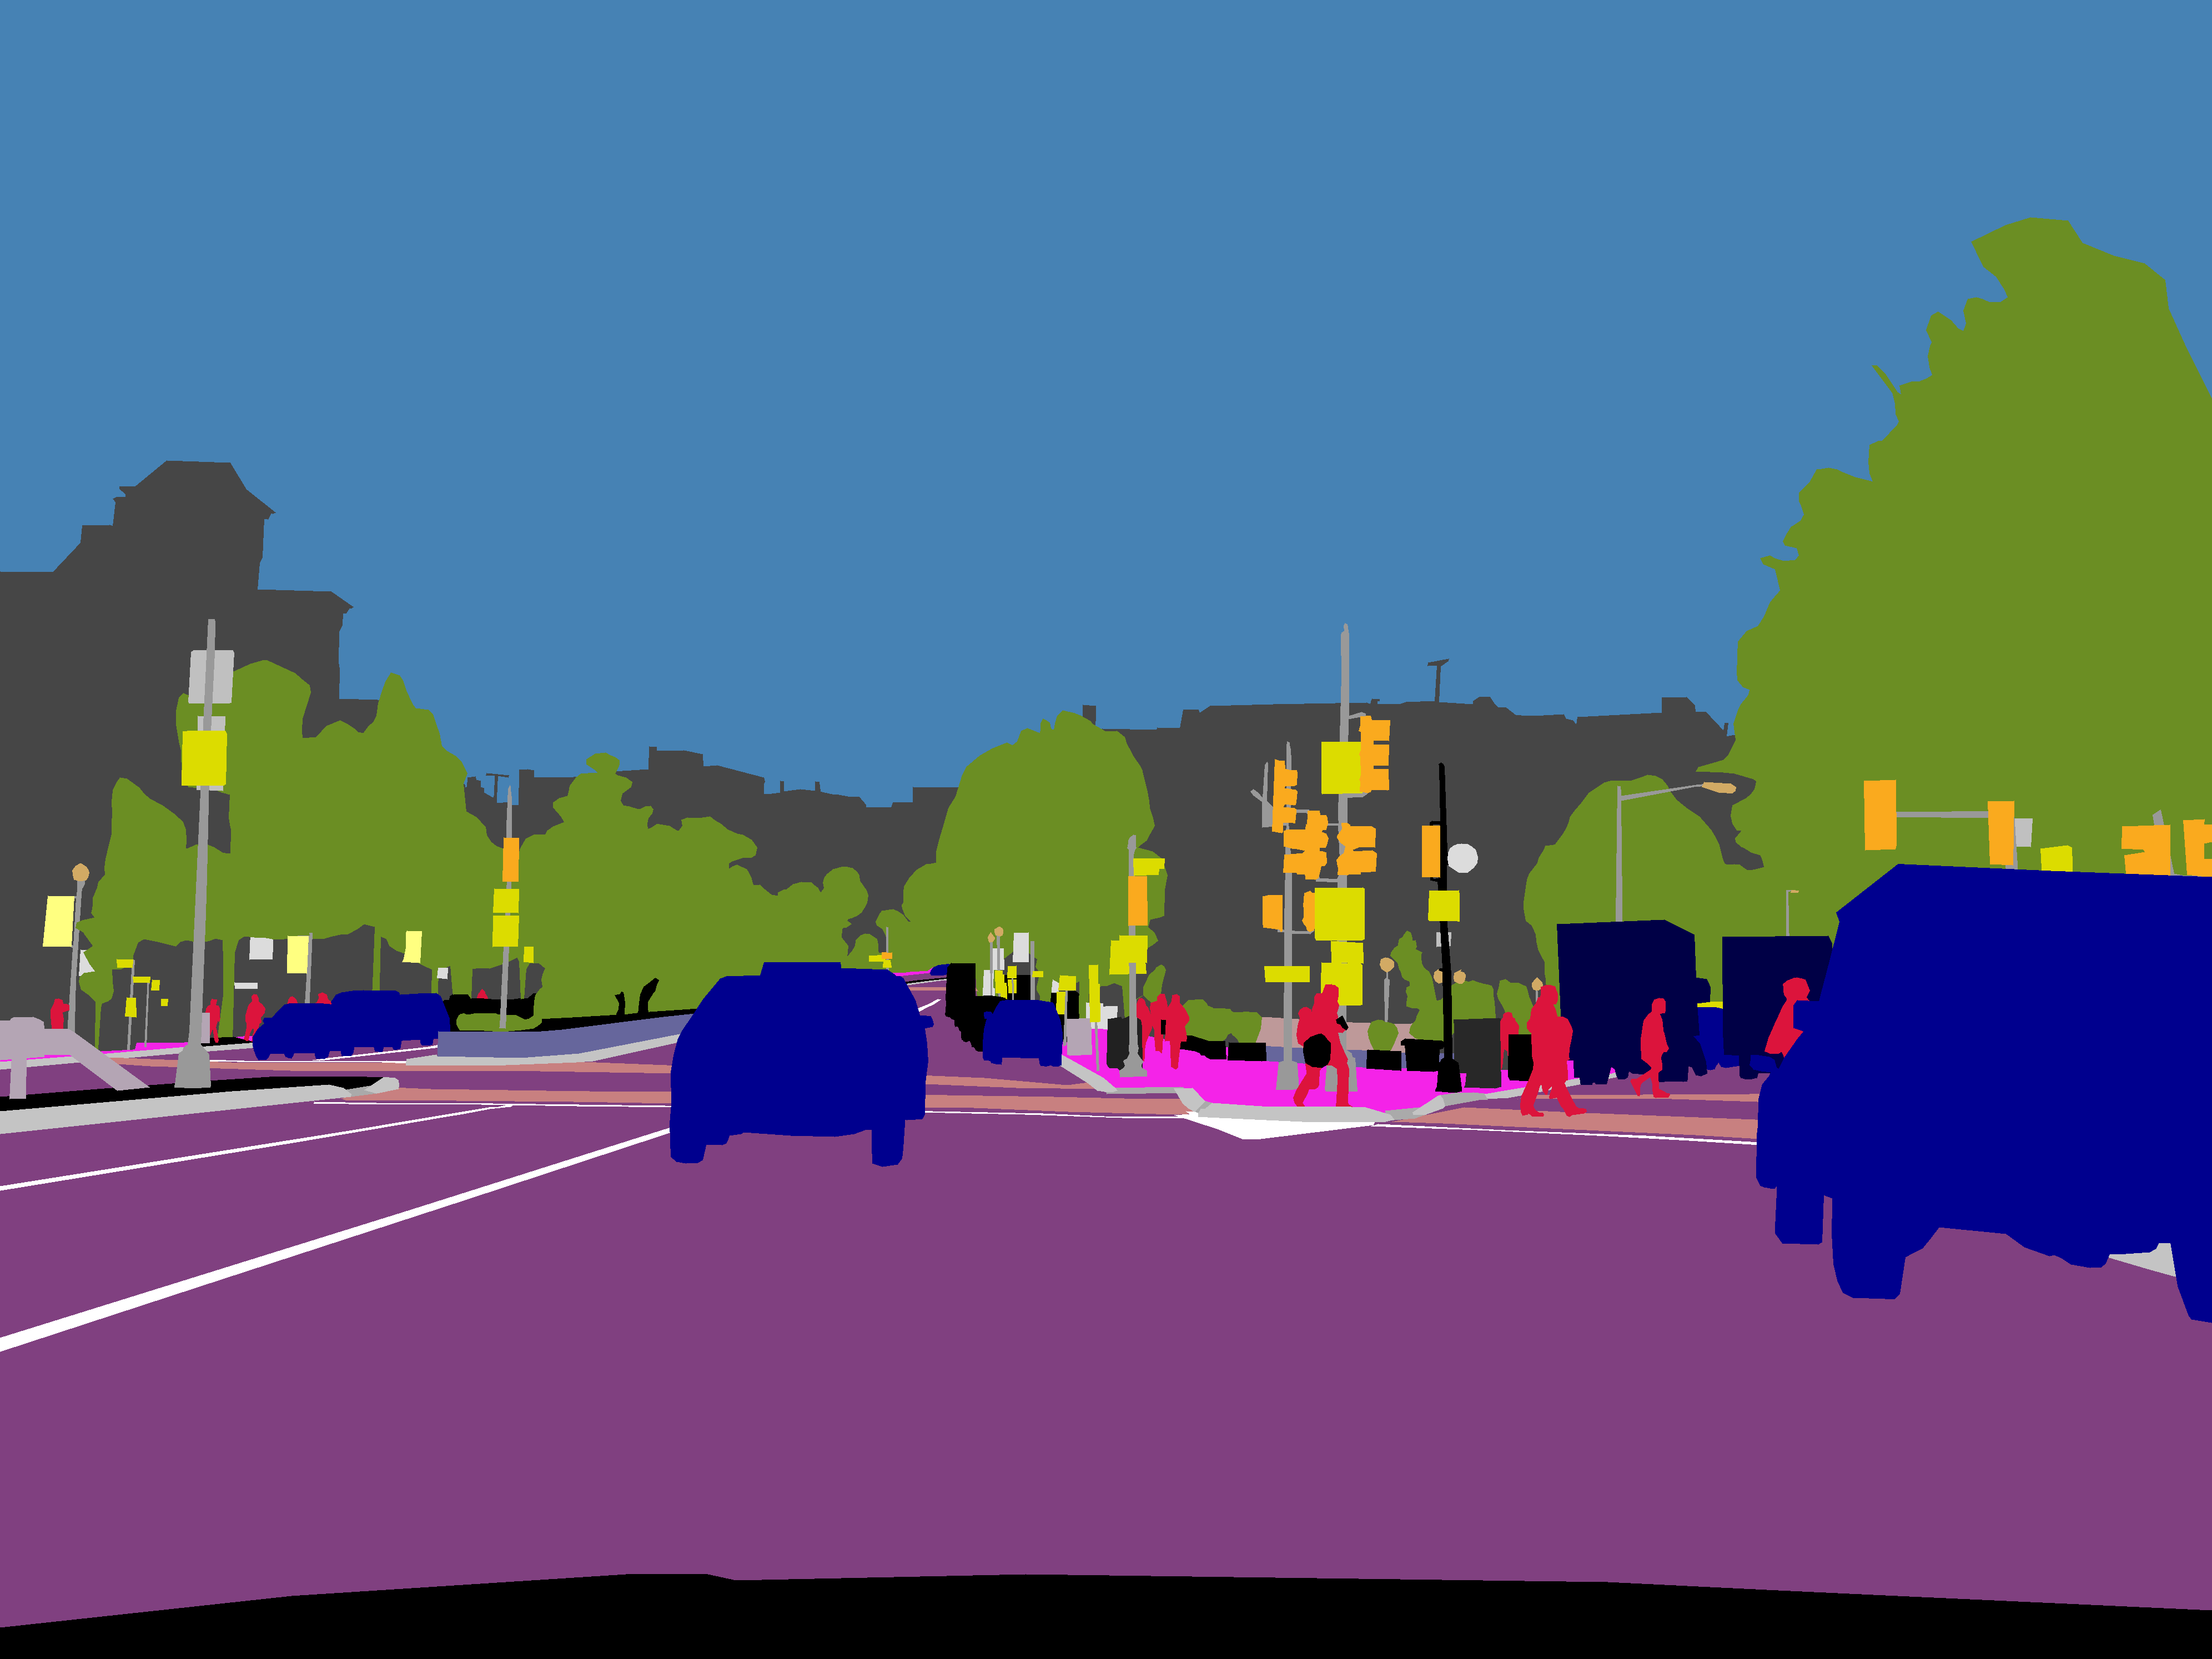

In [10]:
label_image

In [11]:
label_arr  = np.array(label_image)

In [12]:
np.shape(label_arr)

(2988, 3984)

In [19]:
label_re = label_image.resize([2048,1024], Image.NEAREST)

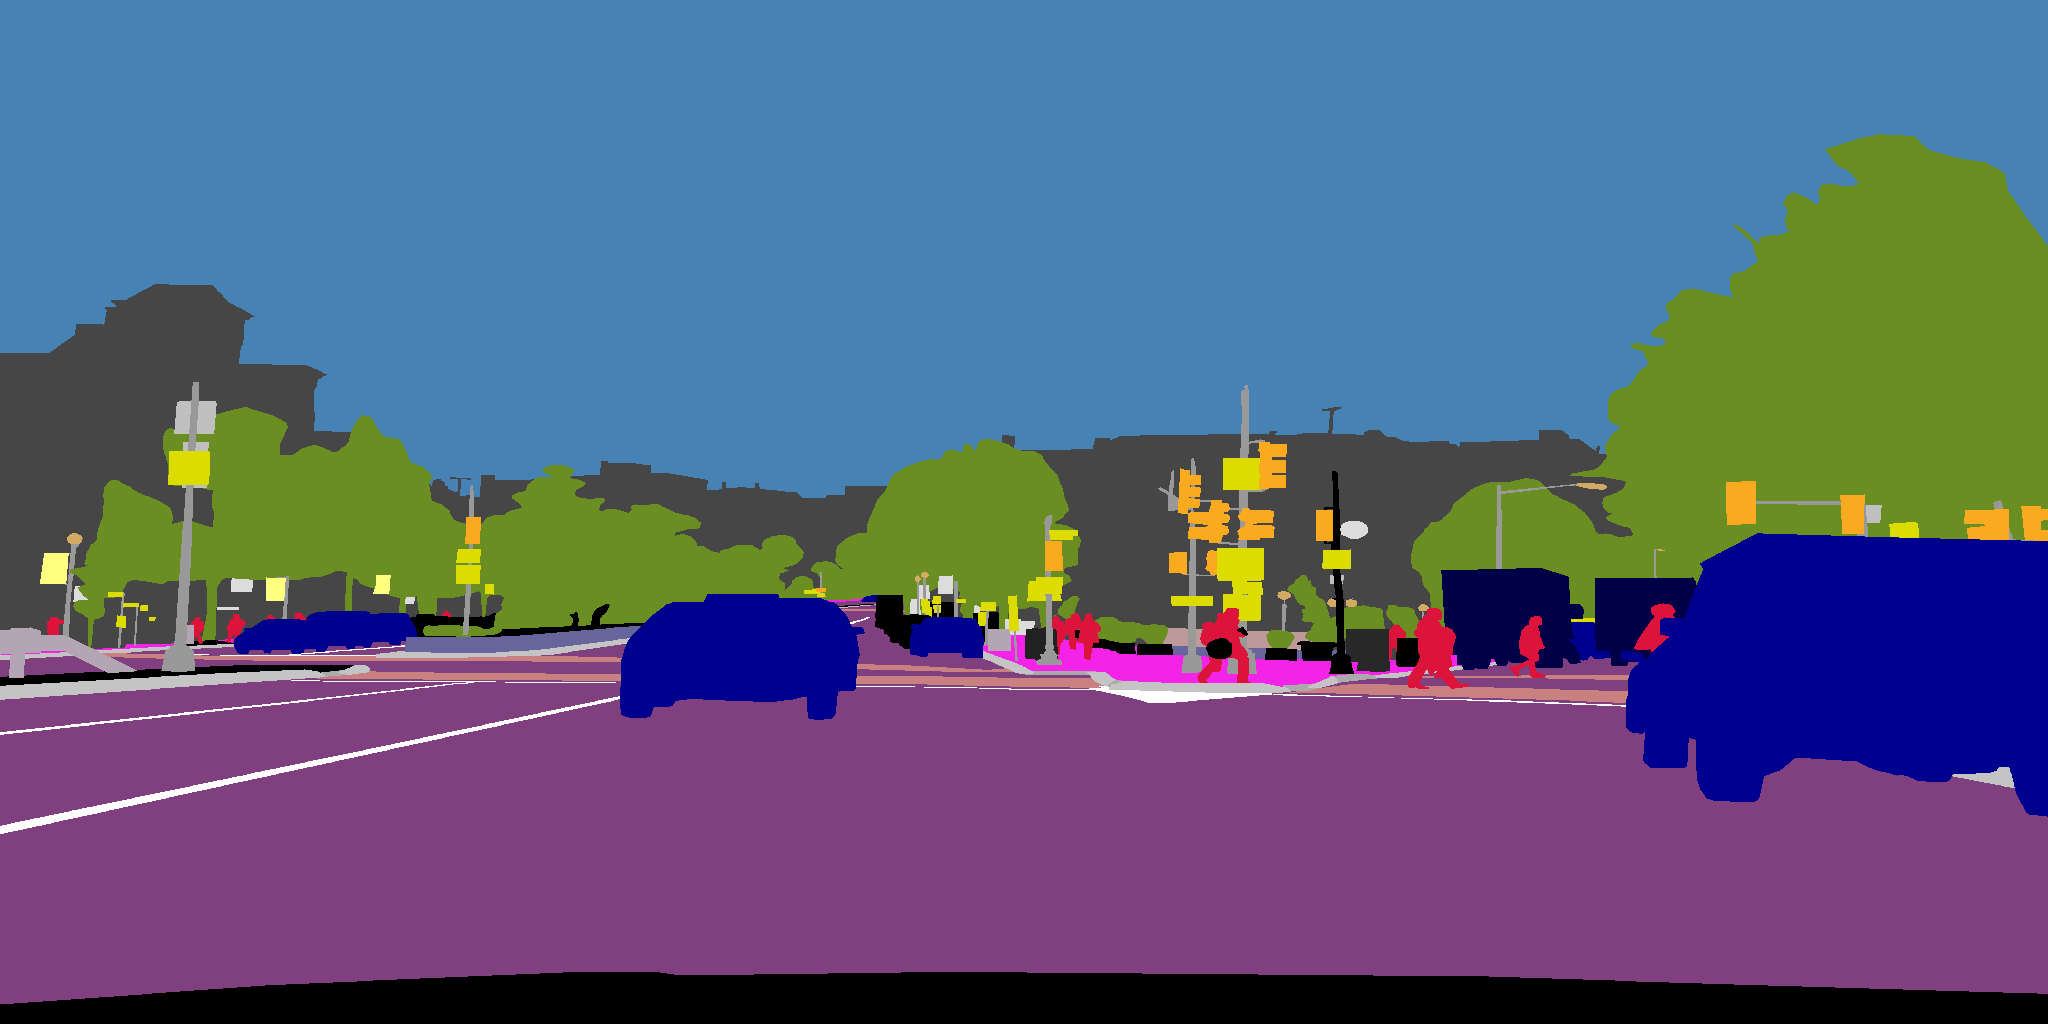

In [20]:
label_re

In [21]:
np.array(label_re)

array([[27, 27, 27, ..., 27, 27, 27],
       [27, 27, 27, ..., 27, 27, 27],
       [27, 27, 27, ..., 27, 27, 27],
       ...,
       [64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64]], dtype=uint8)

instance_label_array = np.array(instance_array / 256, dtype=np.uint8)
instance_label_array2

In [11]:
instance_label_array = np.array(instance_array / 256, dtype=np.uint8)

array([[27, 27, 27, ..., 27, 27, 27],
       [27, 27, 27, ..., 27, 27, 27],
       [27, 27, 27, ..., 27, 27, 27],
       ...,
       [64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64]], dtype=uint8)

In [12]:
import tensorflow as tf

In [21]:
image = tf.image.decode_png(tf.read_file(label_path), channels=1)
image  = tf.image.convert_image_dtype(image, tf.uint8)

In [22]:
sess = tf.Session()
sess.run(image)

array([[[117],
        [117],
        [117],
        ...,
        [117],
        [117],
        [117]],

       [[117],
        [117],
        [117],
        ...,
        [117],
        [117],
        [117]],

       [[117],
        [117],
        [117],
        ...,
        [117],
        [117],
        [117]],

       ...,

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        ...,
        [  0],
        [  0],
        [  0]]], dtype=uint8)

In [113]:
import re
_IMAGE_FILENAME_RE = re.compile('(.+)')

In [114]:
_IMAGE_FILENAME_RE

re.compile(r'(.+)', re.UNICODE)

In [99]:
image_files = _get_files('train')
image_files

['/mnt/ngv/datasets/mapillary-vistas/training/labels/--NSVcUgfVhFd6uzkqHOOg.png',
 '/mnt/ngv/datasets/mapillary-vistas/training/labels/--SWG8TJo7vrbZ_x5YLj6A.png',
 '/mnt/ngv/datasets/mapillary-vistas/training/labels/--WOpVBuHlCygAUADkttpg.png',
 '/mnt/ngv/datasets/mapillary-vistas/training/labels/--jRsD9anHdGxv4ZOCQktA.png',
 '/mnt/ngv/datasets/mapillary-vistas/training/labels/--tczNya4_w5IhU9DeRMHw.png',
 '/mnt/ngv/datasets/mapillary-vistas/training/labels/--vWKSR3Rh8quTfK4AuKOQ.png',
 '/mnt/ngv/datasets/mapillary-vistas/training/labels/--zBInAo8-NDrBCfvJ4fEw.png',
 '/mnt/ngv/datasets/mapillary-vistas/training/labels/-0C1J9CvgFP4BTVLXNeNZA.png',
 '/mnt/ngv/datasets/mapillary-vistas/training/labels/-0GQmYRienNVqEKiQ0Mkyw.png',
 '/mnt/ngv/datasets/mapillary-vistas/training/labels/-0Q9X3KqBrhdlGzap-YToQ.png',
 '/mnt/ngv/datasets/mapillary-vistas/training/labels/-0QdotcnWZMgDLHELjMeoQ.png',
 '/mnt/ngv/datasets/mapillary-vistas/training/labels/-0xySwkm6plG4nznHLQcHg.png',
 '/mnt/ngv/datas

In [115]:
re_match = _IMAGE_FILENAME_RE.search(image_files[0])

In [116]:
re_match

<_sre.SRE_Match object; span=(0, 77), match='/mnt/ngv/datasets/mapillary-vistas/training/label>

In [117]:
filename = os.path.basename(re_match.group())
filename

'--NSVcUgfVhFd6uzkqHOOg.png'

In [118]:
re_match.group()

'/mnt/ngv/datasets/mapillary-vistas/training/labels/--NSVcUgfVhFd6uzkqHOOg.png'

In [70]:
label_files = _get_files(dataset_split)
label_files

['/mnt/ngv/datasets/mapillary-vistas/validation/labels/--BJs76vloEaiH-wppzWNA.png',
 '/mnt/ngv/datasets/mapillary-vistas/validation/labels/-3-MmXdwhyIQhtb4-8NqHQ.png',
 '/mnt/ngv/datasets/mapillary-vistas/validation/labels/-32tlgoydG0ZCyijh8piZQ.png',
 '/mnt/ngv/datasets/mapillary-vistas/validation/labels/-4jzRzGfKmQg8RBNlNqnGQ.png',
 '/mnt/ngv/datasets/mapillary-vistas/validation/labels/-9y4NjcjdoPFMs5wwC7otg.png',
 '/mnt/ngv/datasets/mapillary-vistas/validation/labels/-BYnT4s40fJHAlOumPYbyQ.png',
 '/mnt/ngv/datasets/mapillary-vistas/validation/labels/-BqO16ocxK46wM5W-QCE_A.png',
 '/mnt/ngv/datasets/mapillary-vistas/validation/labels/-C-x3xSPFIEjqbyVC5PRaQ.png',
 '/mnt/ngv/datasets/mapillary-vistas/validation/labels/-DXgAnuaSe6TtQ9Hbm3G2A.png',
 '/mnt/ngv/datasets/mapillary-vistas/validation/labels/-F-jXLRFKunhfJg4s-62jA.png',
 '/mnt/ngv/datasets/mapillary-vistas/validation/labels/-F5vhdPopdHyJjiC2hI6xg.png',
 '/mnt/ngv/datasets/mapillary-vistas/validation/labels/-OB82zvf2k0rTOxuMEuQG

In [ ]:
area = (200, 50, 2000, 900)
left_est_crop = left_est.crop(area)

In [1]:
from __future__ import print_function
import glob
import os.path
import numpy as np

from PIL import Image


# A map from data type to filename postfix.
_DATA_SPLIT_MAP = {
    'train': 'training',
    'val': 'validation',
}

_DATA_FORMAT_MAP = {
    'image': 'jpg',
    'label': 'png',
}

_DATA_TYPE_MAP = {
    'image':'images',
    'label':'labels',
}

dataset_root = '/mnt/ngv/datasets/mapillary-vistas/'
train_save_dir = './training'
val_save_dir = './validation'

def _get_files(dataset_split, data):
    pattern = '*.%s' % (_DATA_FORMAT_MAP[data])
    search_files = os.path.join(dataset_root, _DATA_SPLIT_MAP[dataset_split],_DATA_TYPE_MAP[data], pattern)
    filenames = glob.glob(search_files)
    return sorted(filenames)

def _resize_images(img, mask):
    assert img.size == mask.size
    w, h = img.size
    th = 1024
    tw = 2048
    if w == tw and h == th:
        return img, mask
    else:
        return img.resize((tw, th), Image.BILINEAR), mask.resize((tw, th), Image.NEAREST)

In [2]:
train_image_files = _get_files('train','image')
train_label_files = _get_files('train','label')
val_image_files = _get_files('val','image')
val_label_files = _get_files('val','label')

In [39]:
os.path.splitext(os.path.basename(train_image_files[0]))

('--NSVcUgfVhFd6uzkqHOOg', '.jpg')

In [37]:
train_label_files[0]

'/mnt/ngv/datasets/mapillary-vistas/training/labels/--NSVcUgfVhFd6uzkqHOOg.png'

In [3]:
train_num = 1
val_num = 1

In [42]:
for i in range(train_num):
    print('>>processing image %d of %d images' % (i, train_num))
    train_image = Image.open(train_image_files[i])
    train_label = Image.open(train_label_files[i])
    
    train_image.show()
    
    train_label.show()
    (image_name,_) = os.path.splitext(os.path.basename(train_image_files[i]))
    (label_name,_) = os.path.splitext(os.path.basename(train_label_files[i]))
    if image_name != label_name:
        raise RuntimeError('Name mismatched between image and label.')

    train_image, train_label = _resize_images(train_image, train_label)

    image_file_name = '%s/%s/%s.jpg' % (train_save_dir, 'images', image_name)
    train_image.show()
    
    train_label.show()

    label_array = np.array(train_label)
    label_id = Image.fromarray(label_array)

    label_file_name = '%s/%s/%s.png' % (train_save_dir, 'labels', label_name)
    label_id.show()

>>processing image 0 of 1 images


In [43]:
image_file_name

'./training/images/--NSVcUgfVhFd6uzkqHOOg.jpg'

In [44]:
label_file_name

'./training/labels/--NSVcUgfVhFd6uzkqHOOg.png'

In [6]:
for i in range(val_num):
    print('>>processing image %d of %d images' % (i, val_num))
    val_image = Image.open(val_image_files[i])
    val_label = Image.open(val_label_files[i])
    (image_name,_) = os.path.splitext(os.path.basename(val_image_files[i]))
    (label_name,_) = os.path.splitext(os.path.basename(val_label_files[i]))

    if image_name != label_name:
        raise RuntimeError('Name mismatched between image and label.')

    val_image, val_label = _resize_images(val_image, val_label)

    image_file_name = '%s/%s/%s.jpg' % (val_save_dir, 'images', image_name)
    val_image.show()

    label_array = np.array(val_label)
    label_id = Image.fromarray(label_array)

    label_file_name = '%s/%s/%s.png' % (val_save_dir, 'labels', label_name)
    label_id.show()

>>processing image 0 of 1 images


In [7]:
image_file_name

'./validation/images/--BJs76vloEaiH-wppzWNA.jpg'

In [8]:
label_file_name

'./validation/labels/--BJs76vloEaiH-wppzWNA.png'